In [3]:
import math

RPM = 5676
N = 0.8 # efficiency
R_FUEL = 0.15/2 # radius of the ball
D_WHEEL = 0.1016 # diameter of the wheel
V0 = ((RPM * 2 * math.pi)/60 * D_WHEEL/2)/2 * N # exit velocity
W0 = V0 / R_FUEL # exit angular velocity

m = 0.20366297 # mass of the ball
g = 9.81 # acceleration due to gravity
p = 1.225 # density of air

Cd = 0.47 # drag coefficient
Cl = 0.2 * R_FUEL * W0 / V0 # lift coefficient
A = math.pi*R_FUEL**2 # cross-sectional area

In [4]:
deltaT = 0.00001

In [5]:
def ax(vx,vy):
    return (-1/2 * p * A / m) * (math.sqrt(vx**2 + vy**2)) * (Cd*vx + Cl*vy)
def ay(vx,vy):
    return -g + ((-1/2 * p * A / m) * (math.sqrt(vx**2 + vy**2)) * (Cd*vy - Cl*vx))

In [6]:
def vx(ax, t, oldvx):
    return oldvx + ax * t

def vy(ay, t, oldvy):
    return oldvy + ay * t

def x(vx, t, oldx):
    return oldx + vx * t

def y(vy, t, oldy):
    return oldy + vy * t

# 72 degree lookup table for deciding rpm

In [8]:
import numpy as np

all_scenarios = []

for RPM in range(1000,5767,100):
    V0 = ((RPM * 2 * math.pi)/60 * D_WHEEL/2)/2 * N
    vx0 = V0 * math.cos(math.radians(72))
    vy0 = V0 * math.sin(math.radians(72))
    
    ax0 = ax(vx0,vy0)
    ay0 = ay(vx0,vy0)
    x0 = 0
    y0 = 0.5334

    velocity = []
    position = []

    for t in np.arange(0,3,deltaT):
        newvy = vy(ay0,deltaT,vy0)
        newvx = vx(ax0,deltaT,vx0)
        newy = y(vy0,deltaT,y0)
        newx = x(vx0,deltaT,x0)
        velocity.append((newvx,newvy))
        position.append((newx,newy))
        ay0 = ay(vx0,vy0)
        ax0 = ax(vx0,vy0)
        vy0 = newvy
        vx0 = newvx
        x0 = newx
        y0 = newy
    
    all_scenarios.append({
        "RPM": RPM,
        "Position": position,
        "Velocity": velocity
        })

In [9]:
x = []
y = []

for scenario in all_scenarios:
    counter = 0
    for position in scenario["Position"]:
        x = position[0]
        y = position[1]
        if (y > 1.872 + R_FUEL) & (scenario["Velocity"][counter][1] < 0):
            scenario["distance"] = x
            break
        
        counter += 1


In [10]:
final_table = []
for scenario in all_scenarios:
    try:
        print(f"RPM: {scenario['RPM']}, distance: {scenario['distance']}")
        final_table.append({
            'RPM': scenario['RPM'],
            'distance': scenario['distance']
        })
    except Exception as e:
        continue

RPM: 2700, distance: 0.9167815377628172
RPM: 2800, distance: 0.9805054926275507
RPM: 2900, distance: 1.0457862840846097
RPM: 3000, distance: 1.1125768512003629
RPM: 3100, distance: 1.1807952097019974
RPM: 3200, distance: 1.250376125086501
RPM: 3300, distance: 1.321254340475818
RPM: 3400, distance: 1.3933646603670862
RPM: 3500, distance: 1.4666219282533777
RPM: 3600, distance: 1.5409600479386723
RPM: 3700, distance: 1.6163132841880983
RPM: 3800, distance: 1.6926163355375365
RPM: 3900, distance: 1.7697826809260975
RPM: 4000, distance: 1.847769059669516
RPM: 4100, distance: 1.9265119086180753
RPM: 4200, distance: 2.0059027120053146
RPM: 4300, distance: 2.085923613688633
RPM: 4400, distance: 2.166466357288984
RPM: 4500, distance: 2.2474924247909436
RPM: 4600, distance: 2.328941437601464
RPM: 4700, distance: 2.410754021111763
RPM: 4800, distance: 2.4928471195377213
RPM: 4900, distance: 2.575162643264708
RPM: 5000, distance: 2.657668949101139
RPM: 5100, distance: 2.7402600423409926
RPM: 5200

In [11]:
final_table

[{'RPM': 2700, 'distance': 0.9167815377628172},
 {'RPM': 2800, 'distance': 0.9805054926275507},
 {'RPM': 2900, 'distance': 1.0457862840846097},
 {'RPM': 3000, 'distance': 1.1125768512003629},
 {'RPM': 3100, 'distance': 1.1807952097019974},
 {'RPM': 3200, 'distance': 1.250376125086501},
 {'RPM': 3300, 'distance': 1.321254340475818},
 {'RPM': 3400, 'distance': 1.3933646603670862},
 {'RPM': 3500, 'distance': 1.4666219282533777},
 {'RPM': 3600, 'distance': 1.5409600479386723},
 {'RPM': 3700, 'distance': 1.6163132841880983},
 {'RPM': 3800, 'distance': 1.6926163355375365},
 {'RPM': 3900, 'distance': 1.7697826809260975},
 {'RPM': 4000, 'distance': 1.847769059669516},
 {'RPM': 4100, 'distance': 1.9265119086180753},
 {'RPM': 4200, 'distance': 2.0059027120053146},
 {'RPM': 4300, 'distance': 2.085923613688633},
 {'RPM': 4400, 'distance': 2.166466357288984},
 {'RPM': 4500, 'distance': 2.2474924247909436},
 {'RPM': 4600, 'distance': 2.328941437601464},
 {'RPM': 4700, 'distance': 2.410754021111763},

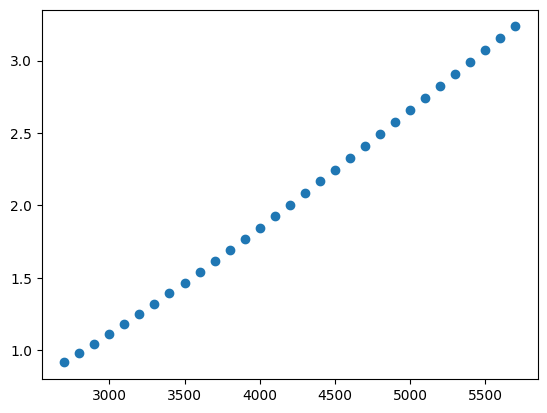

In [13]:
import matplotlib.pyplot as plt

RPMs = [row['RPM'] for row in final_table]
distances = [row['distance'] for row in final_table]

plt.scatter(RPMs,distances)
plt.show()

In [15]:
import csv
import os

with open("topspin.csv", "w") as file:
    writer = csv.DictWriter(file, fieldnames=["RPM", "distance"])
    writer.writeheader()
    writer.writerows(final_table)